In [146]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans
import warnings
import os
import scipy.cluster.hierarchy as shc
warnings.filterwarnings("ignore")

df = pd.read_csv('Dataset.csv')
df

,TruckID,Distance of route,Max.match of route,Consumption,Equipment Sensors,Speed Profile
0,1,500,40,medium,Radar,3
1,2,400,30,low,Radar,4
2,3,310,20,low,Radar Camera,5
3,4,250,10,low,Radar Camera,4
4,5,600,35,high,Radar,2
5,6,1000,50,high,Radar Lidar,3
6,7,300,20,medium,Radar Camera,4
7,8,450,40,low,NaN,5
8,9,800,45,low,Radar Camera,5
9,10,700,40,low,Radar Camera,5


In [16]:
df.shape

(30, 6)

In [17]:
df.describe()

,TruckID,Distance of route,Max.match of route,Speed Profile
count,30.000000,30.000000,30.000000,30.000000
mean,15.500000,560.666667,41.866667,3.800000
std,8.803408,208.507559,22.911725,0.924755
min,1.000000,250.000000,10.000000,2.000000
25%,8.250000,400.000000,27.500000,3.000000
50%,15.500000,520.000000,38.500000,4.000000
75%,22.750000,695.000000,49.750000,4.750000
max,30.000000,1000.000000,95.000000,5.000000


In [18]:
df.dtypes

TruckID                int64
Distance of route      int64
Max.match of route     int64
Consumption           object
Equipment Sensors     object
Speed Profile          int64
dtype: object

In [20]:
plt.style.use('fivethirtyeight')
'''Max match of route and Speed Profile'''
X1 = df[['Max.match of route' , 'Speed Profile']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

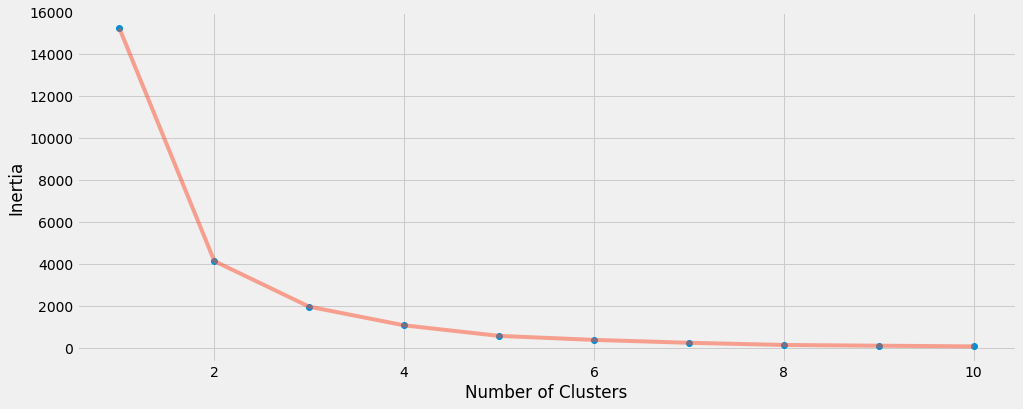

In [21]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [22]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [23]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

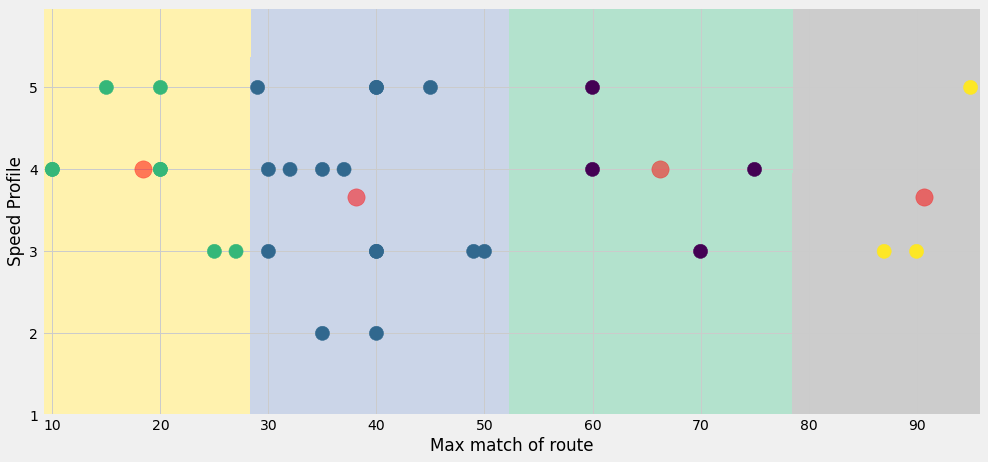

In [24]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Max.match of route' ,y = 'Speed Profile' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Speed Profile') , plt.xlabel('Max match of route')
plt.show()

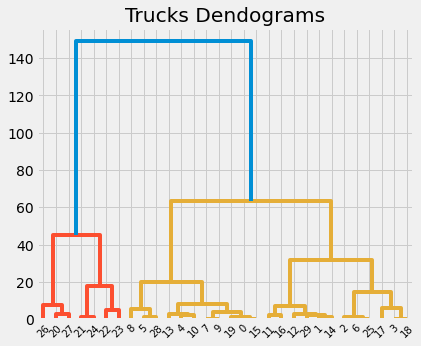

In [25]:
plt.figure(figsize=(6, 5))
plt.title("Trucks Dendograms") 
dend = shc.dendrogram(shc.linkage(X1, method='ward')) #using Ward method 
plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit(X1)

AgglomerativeClustering(n_clusters=5)

In [36]:
labels1

array([1, 2, 2, 2, 1, 0, 2, 1, 3, 3, 1, 2, 1, 3, 3, 0, 1, 2, 2, 1, 0, 0,
       1, 3, 2, 1, 3, 2, 1, 1])

In [39]:
df['Platoon ID'] = labels1


In [104]:

from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(centroids1, X1) #find trucks closest to centroid in each cluster
# closest


In [145]:
isLeader  = np.zeros(shape=(30,1),dtype = int,order='C')
leaderMode = pd.DataFrame(isLeader,columns = ["Mode"])  # Create empty DataFrame with column names

i = 0
# for index, row in df.iterrows():
#     if (i == closest[i]):
#         leaderMode[index,row] = 1
#         i += 1
#         print(i)
leaderMode
df['IsLeader'] = leaderMode
df.loc[closest[0], 'IsLeader'] = 1
df.loc[closest[1], 'IsLeader'] = 1
df.loc[closest[2], 'IsLeader'] = 1
df.loc[closest[3], 'IsLeader'] = 1
df.to_csv('Platoons.csv')

df

,TruckID,Distance of route,Max.match of route,Consumption,Equipment Sensors,Speed Profile,Platoon ID,IsLeader
0,1,500,40,medium,Radar,3,1,1
1,2,400,30,low,Radar,4,2,0
2,3,310,20,low,Radar Camera,5,2,0
3,4,250,10,low,Radar Camera,4,2,0
4,5,600,35,high,Radar,2,1,0
5,6,1000,50,high,Radar Lidar,3,0,0
6,7,300,20,medium,Radar Camera,4,2,0
7,8,450,40,low,NaN,5,1,0
8,9,800,45,low,Radar Camera,5,3,0
9,10,700,40,low,Radar Camera,5,3,1
